In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo

Cloning into 'yolov5'...
remote: Enumerating objects: 15529, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 15529 (delta 49), reused 119 (delta 43), pack-reused 15393
Receiving objects: 100% (15529/15529), 14.59 MiB | 32.61 MiB/s, done.
Resolving deltas: 100% (10577/10577), done.


In [2]:

%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EYE9tlmNukRhC5pgAvXt")
project = rf.workspace("vision-99ksq").project("aripin-bismilah")
dataset = project.version(7).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to /content/datasets/aripin-bismilah-7 in yolov5pytorch:: 100%|██████████| 1226/1226 [00:00<00:00, 2417.24it/s]


In [5]:
!python train.py --img 640 --batch 16 --epochs 1500 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/aripin-bismilah-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1

In [6]:
!pip install nvidia-pyindex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-pyindex: filename=nvidia_pyindex-1.0.9-py3-none-any.whl size=8418 sha256=5ff7f0a81517a3eee774a096a275fae6d20410797a34632f6cef2cfb447d2290
  Stored in directory: /root/.cache/pip/wheels/39/63/71/c50214b560fa8c319598c2de3c1616f6d68e1d2c7f17a5e82d
Successfully built nvidia-pyindex


In [7]:
!pip install nvidia-tensorrt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.5/379.5 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.5/823.5 kB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 MB 2.4 MB/s eta 0:00:00


In [8]:
!python export.py --weights runs/train/exp/weights/best.pt --data {dataset.location}/data.yaml --include tflite

export: data=/content/datasets/aripin-bismilah-7/data.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 9) (13.8 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

                 from  n    params  module                                  arguments                     
2023-04-16 22:35:50.358289: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detecte

In [9]:
!python export.py --weights runs/train/exp/weights/last.pt --data {dataset.location}/data.yaml --include tflite

export: data=/content/datasets/aripin-bismilah-7/data.yaml, weights=['runs/train/exp/weights/last.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/last.pt with output shape (1, 25200, 9) (13.8 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

                 from  n    params  module                                  arguments                     
2023-04-16 22:37:09.770865: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detecte

In [10]:
!python detect.py --weights runs/train/exp/weights/best-fp16.tflite --data {dataset.location}/data.yaml --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best-fp16.tflite'], source=/content/datasets/aripin-bismilah-7/test/images, data=/content/datasets/aripin-bismilah-7/data.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading runs/train/exp/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/61 /content/datasets/aripin-bismilah-7/test/images/2023_03_30_13_15_IMG_3972_JPG_jpg.rf.26ead9417b6054fff124c32e1cf43e4b.jpg: 640x640 1 OKE KUNING, 495.6ms
image 2

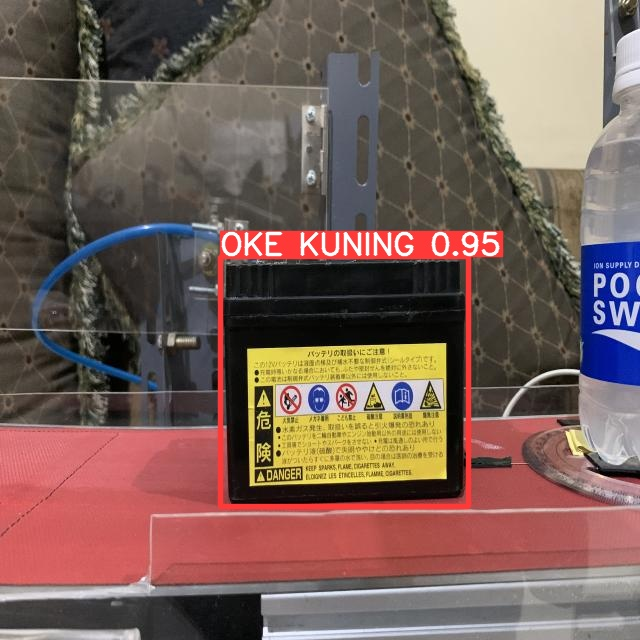

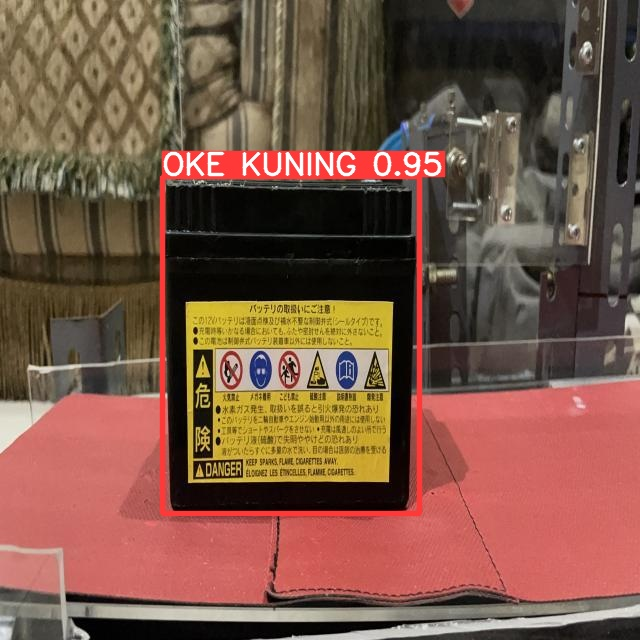

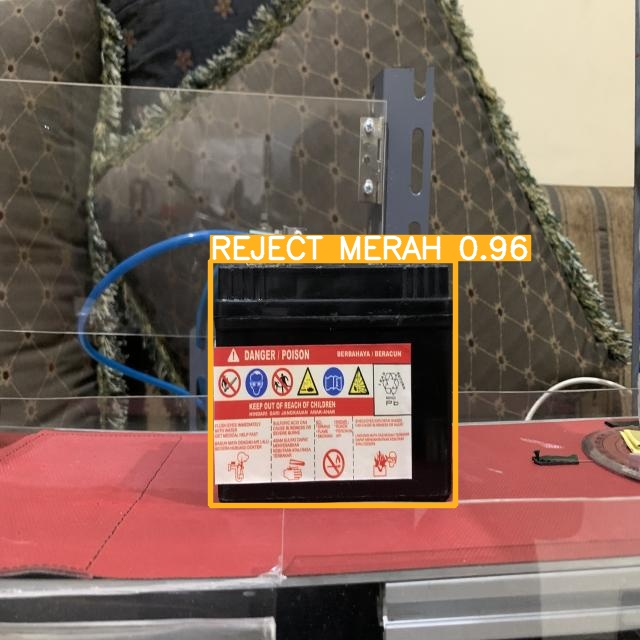

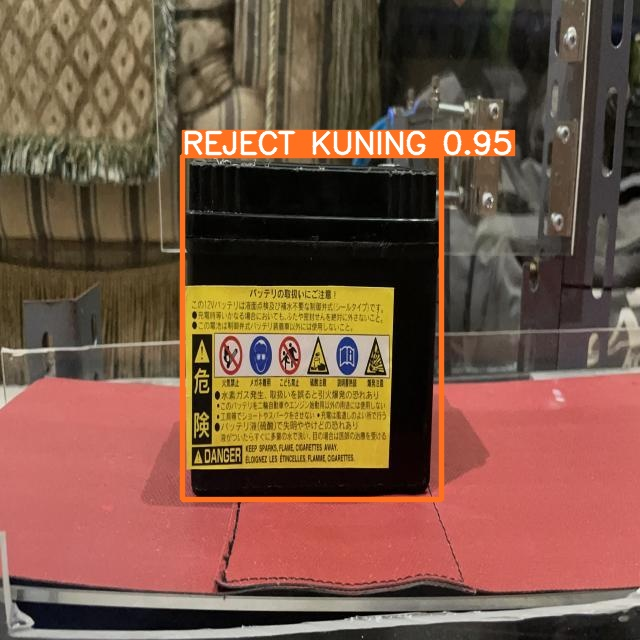

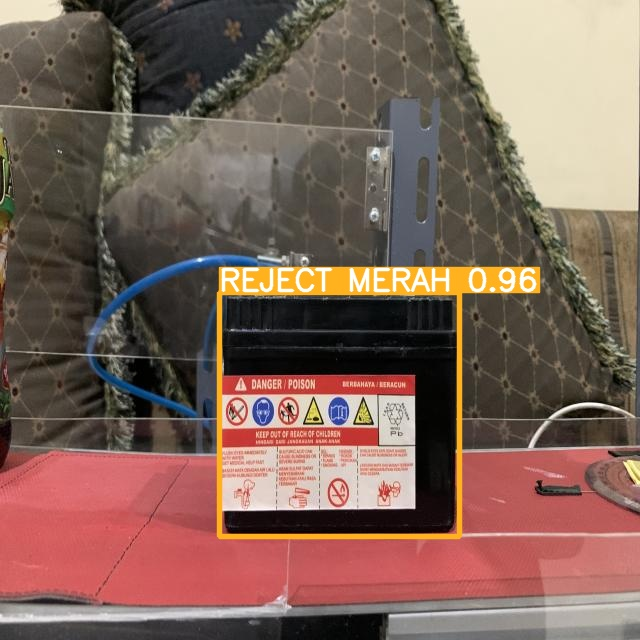

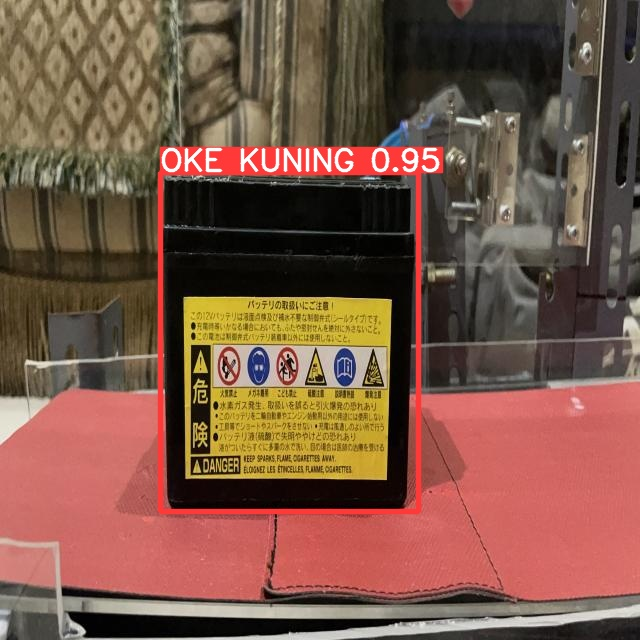

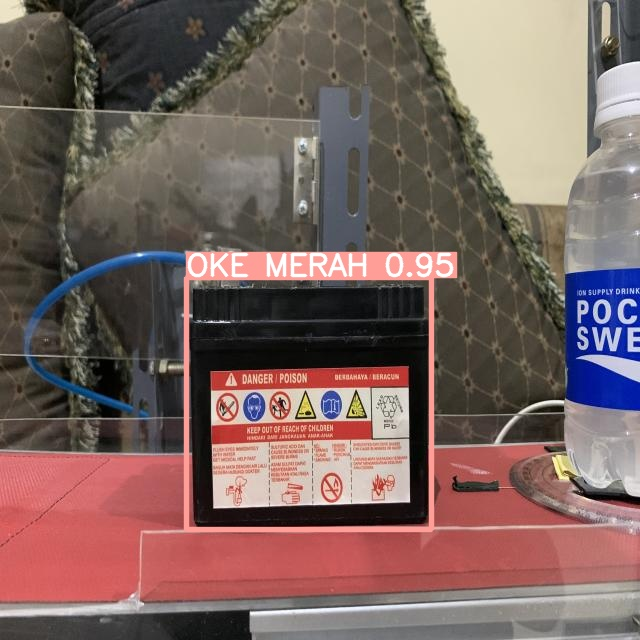

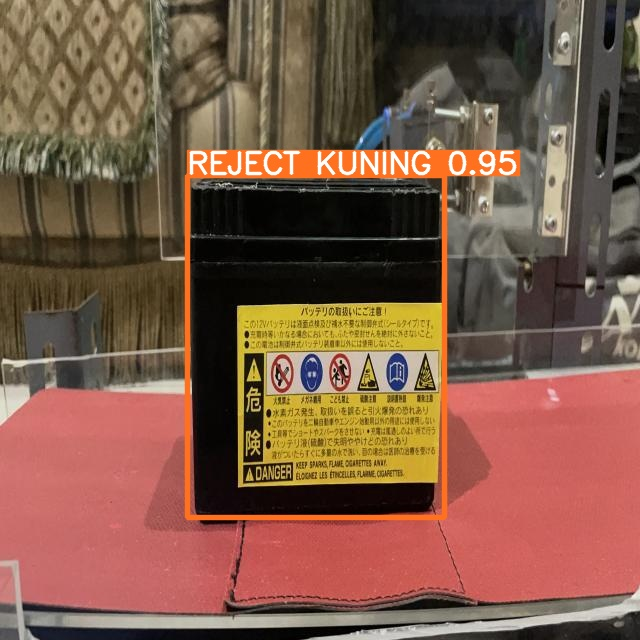

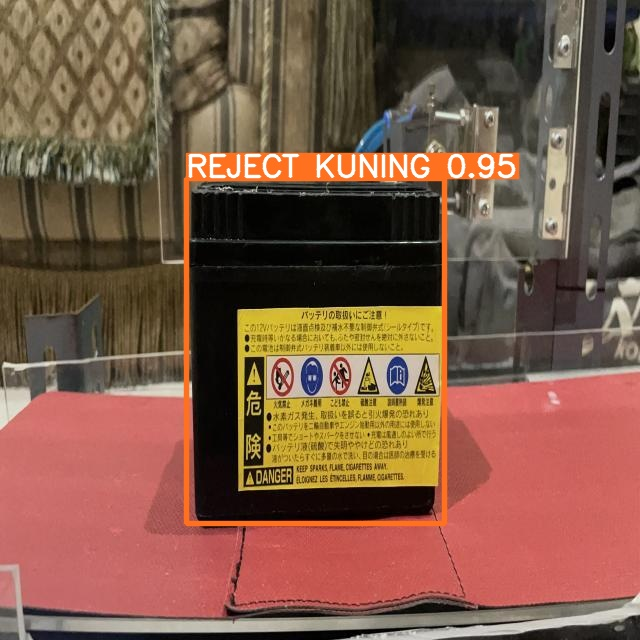

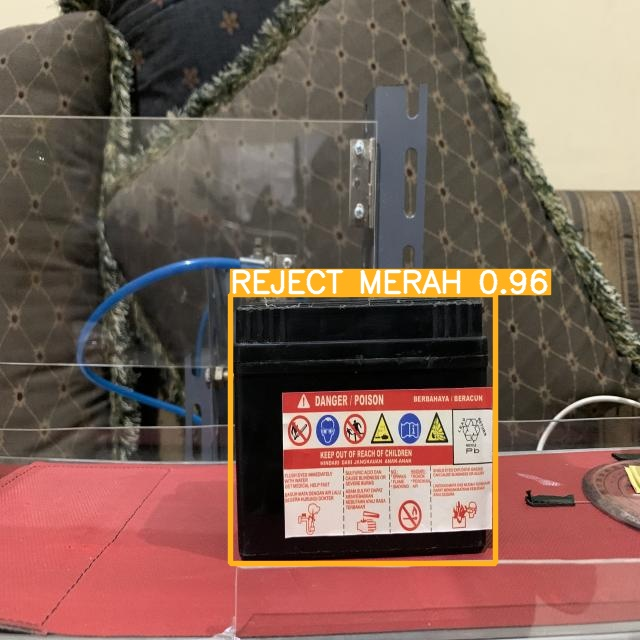

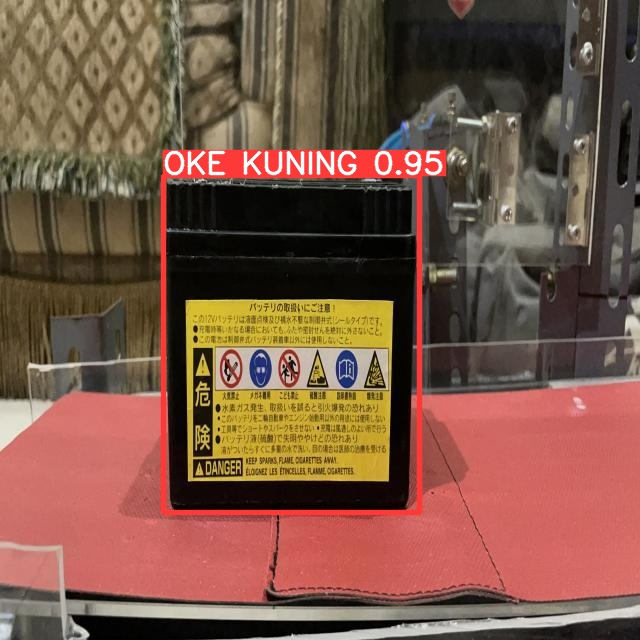

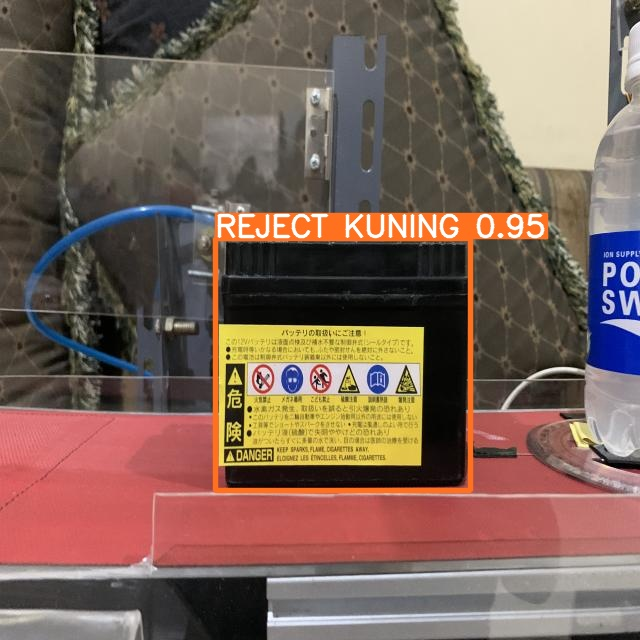

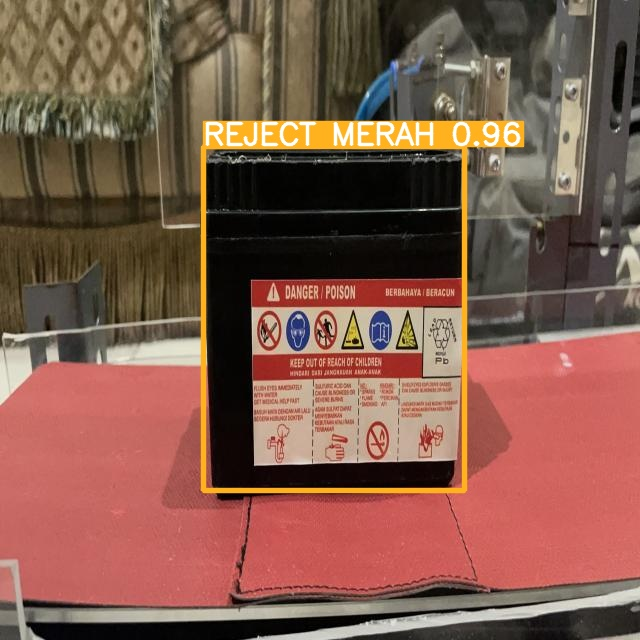

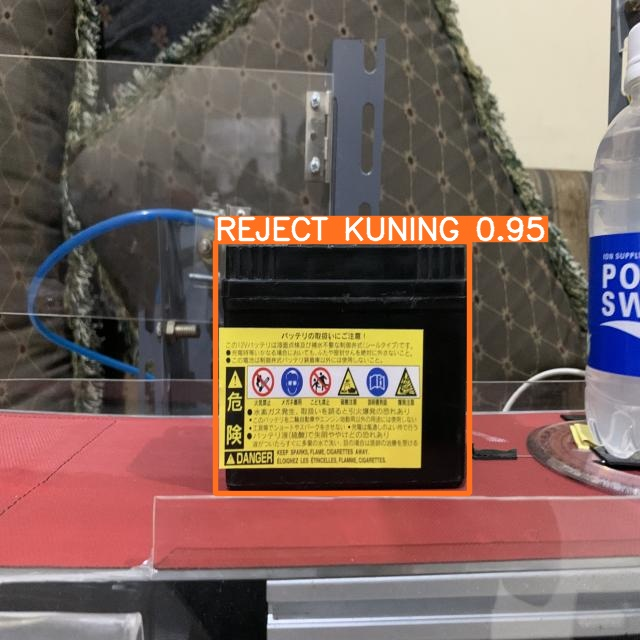

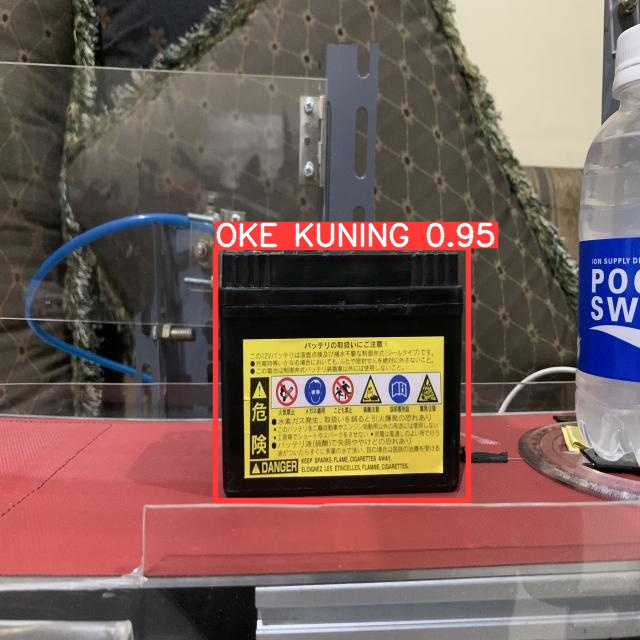

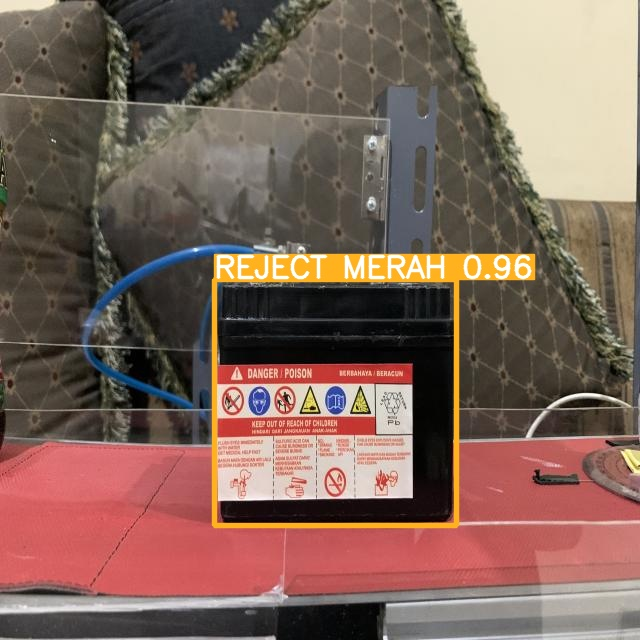

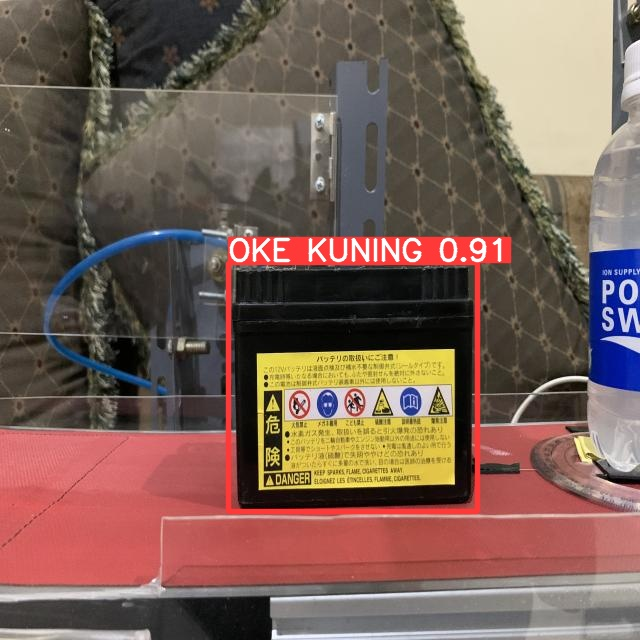

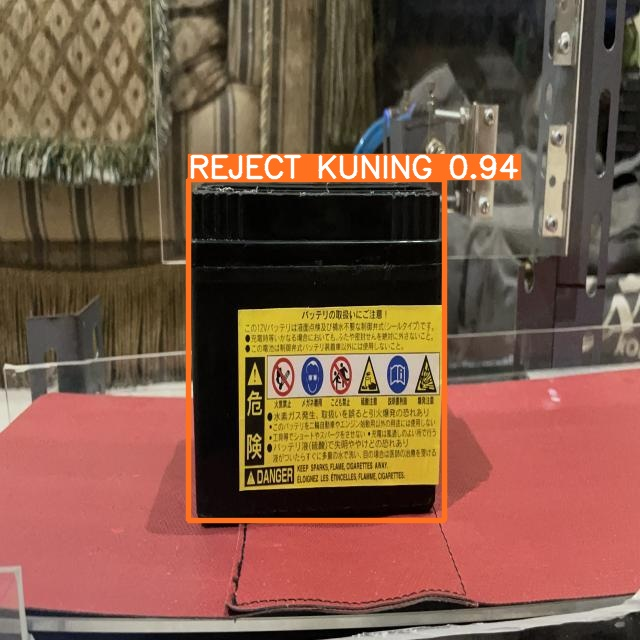

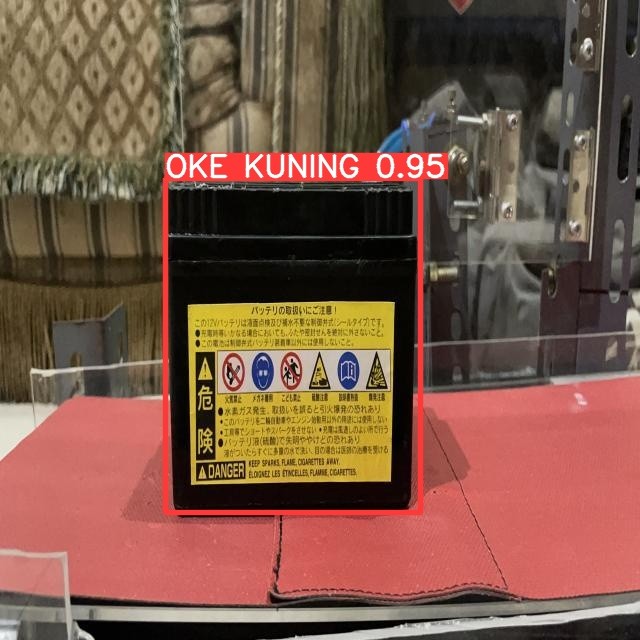

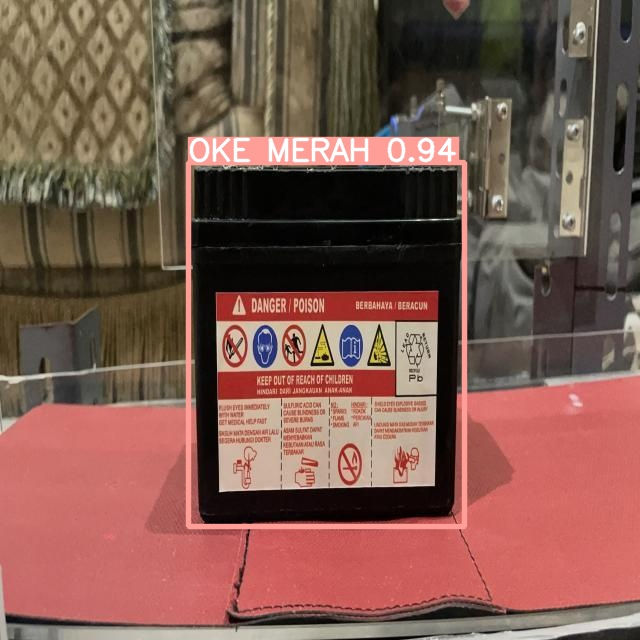

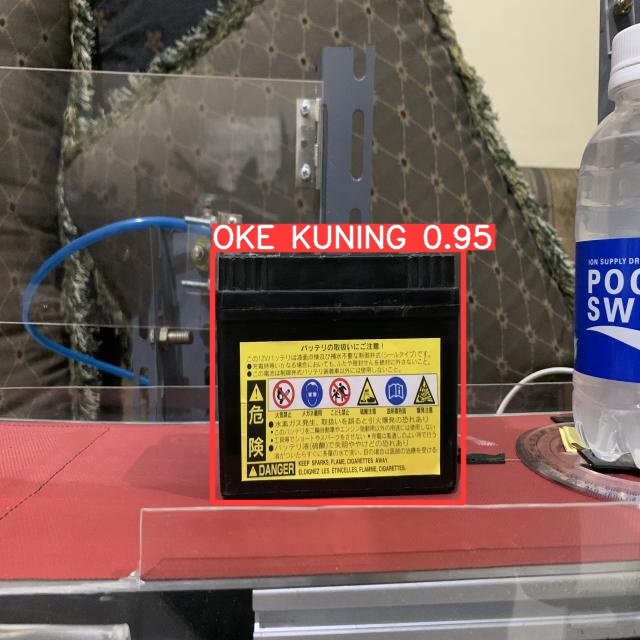

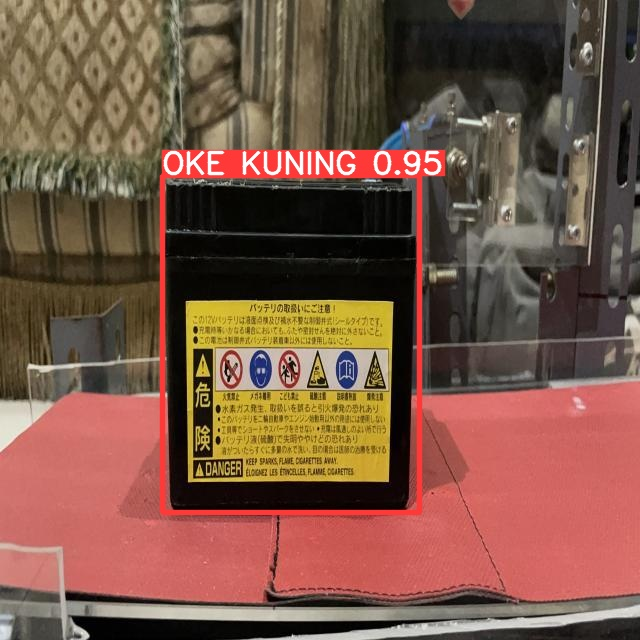

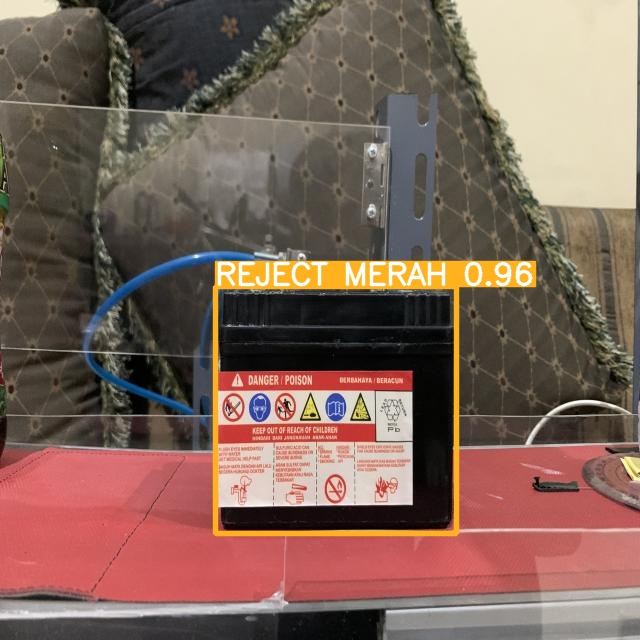

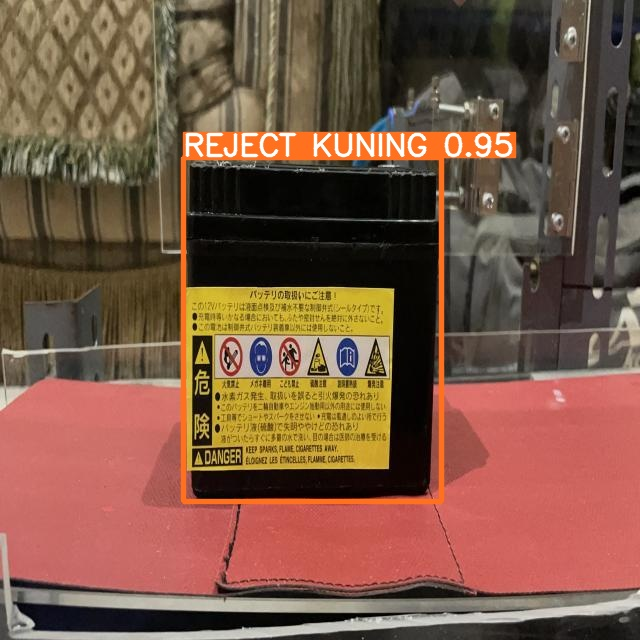

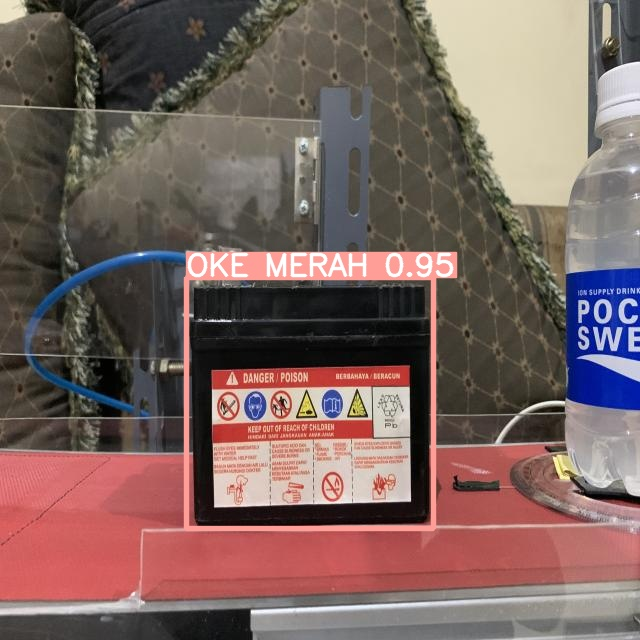

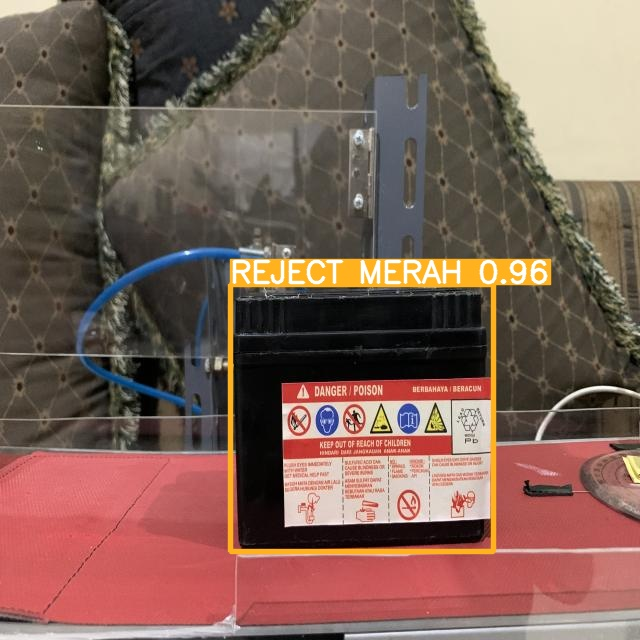

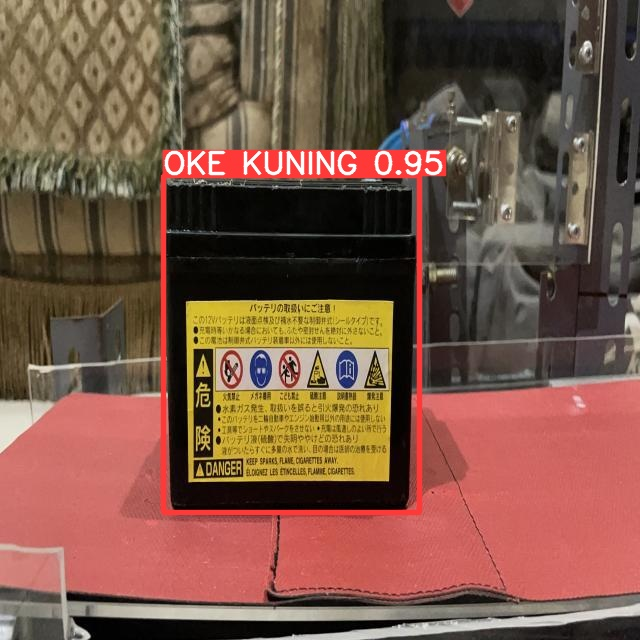

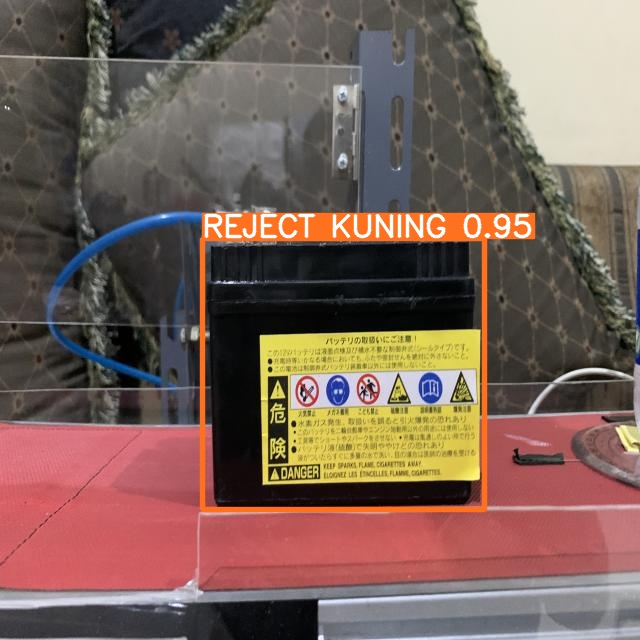

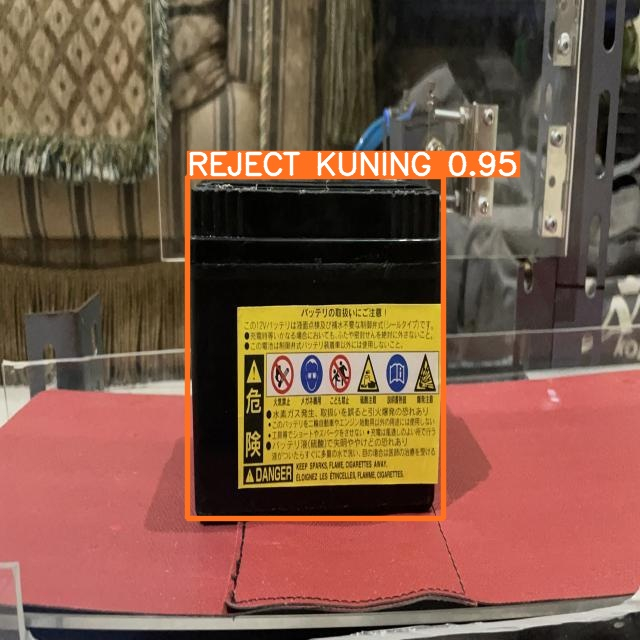

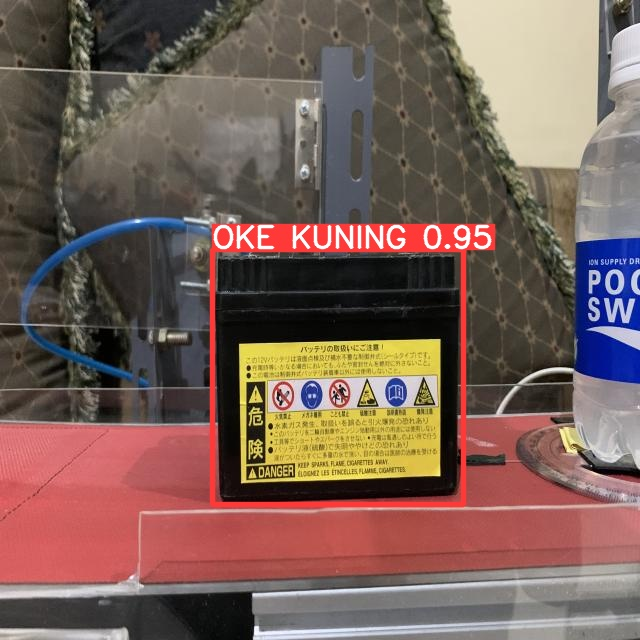

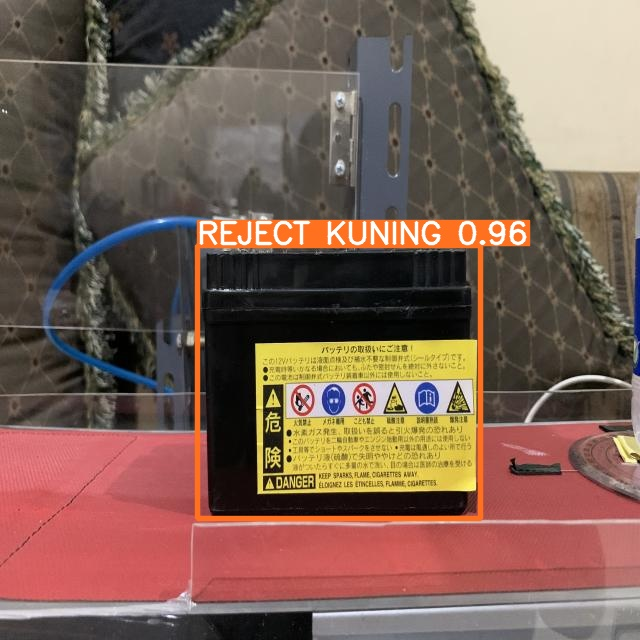

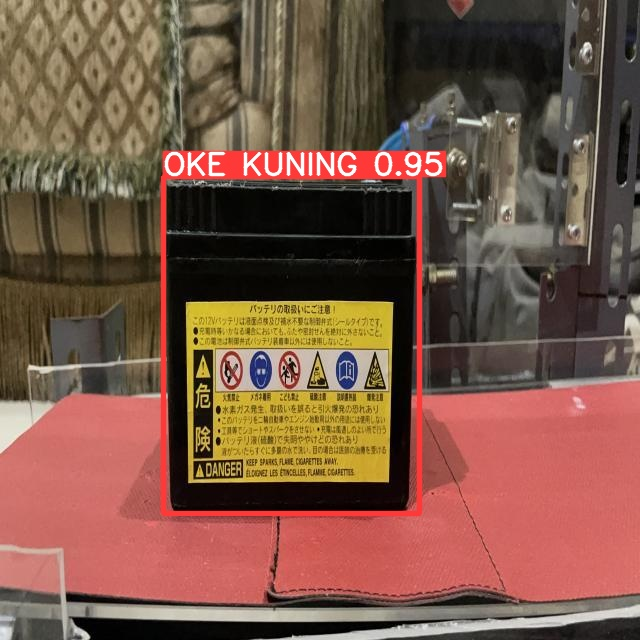

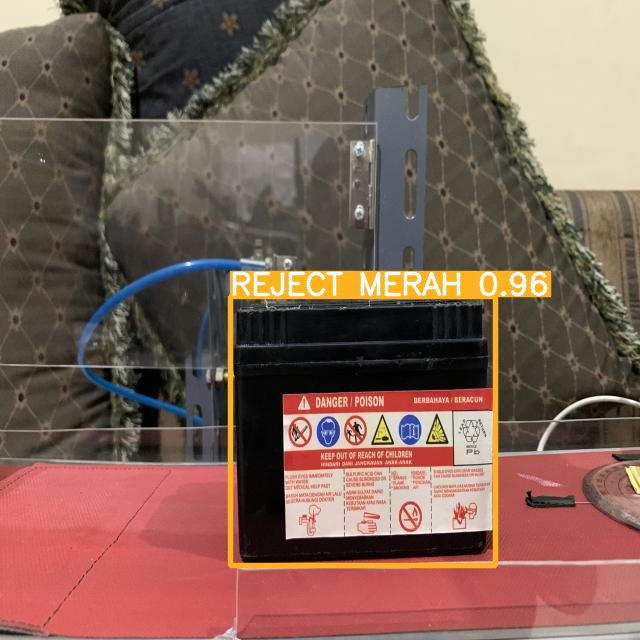

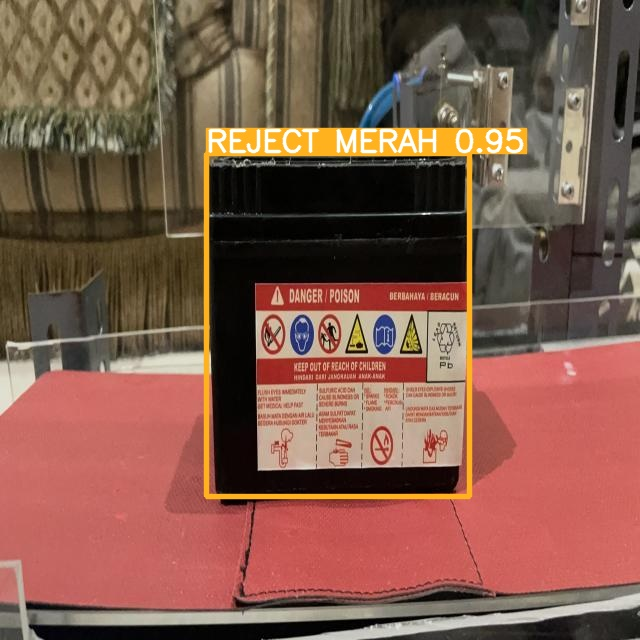

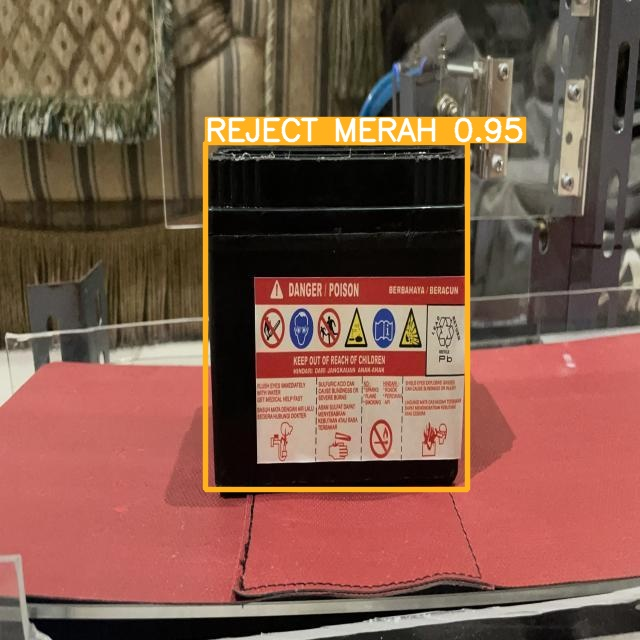

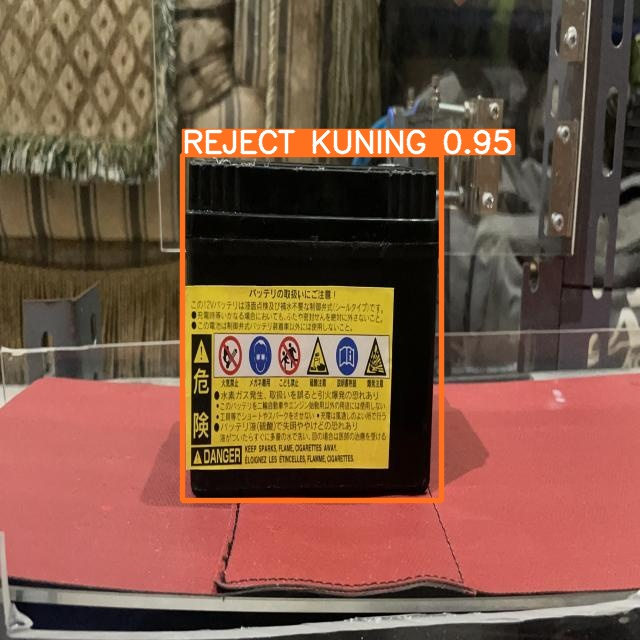

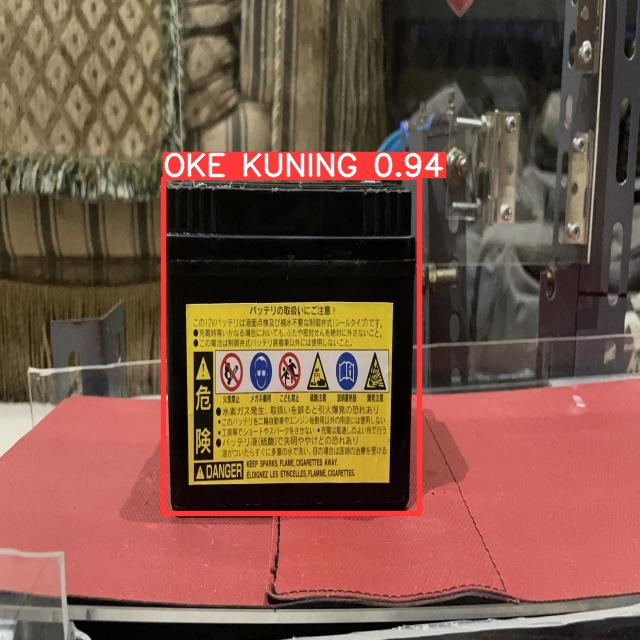

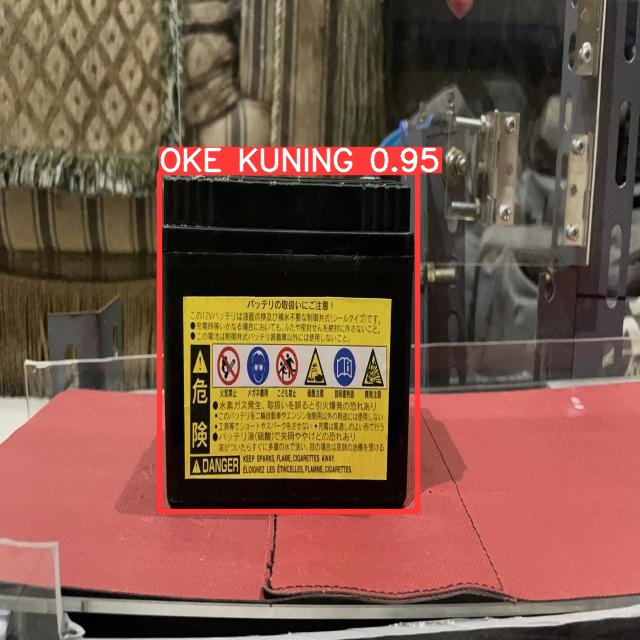

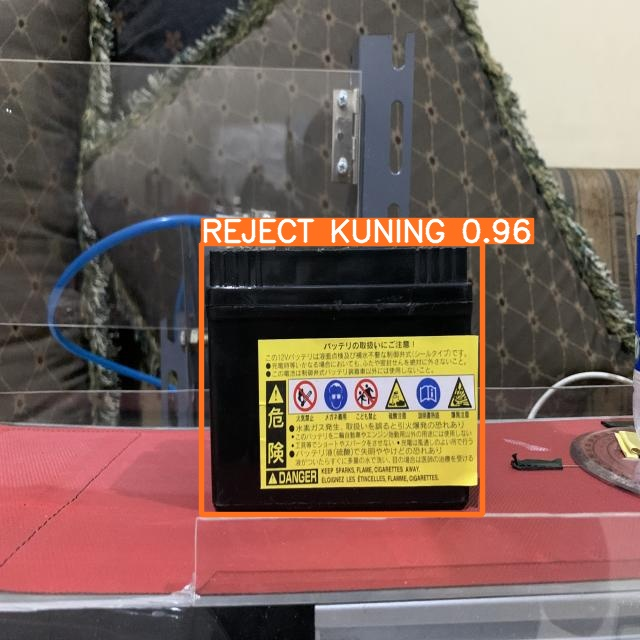

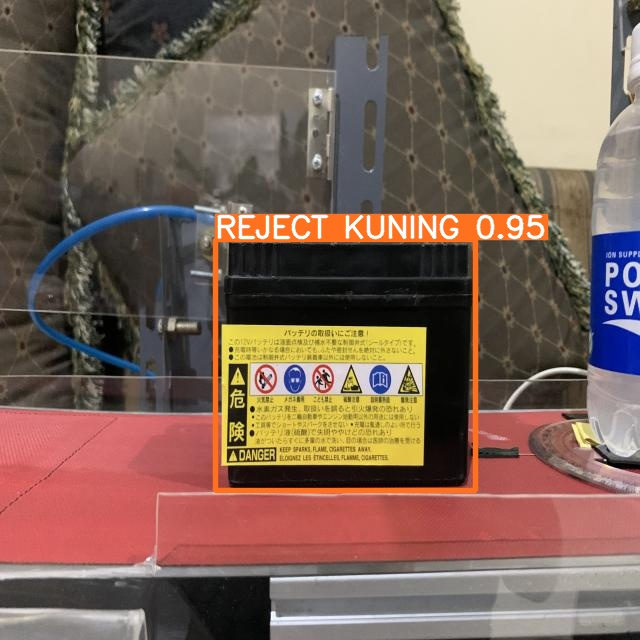

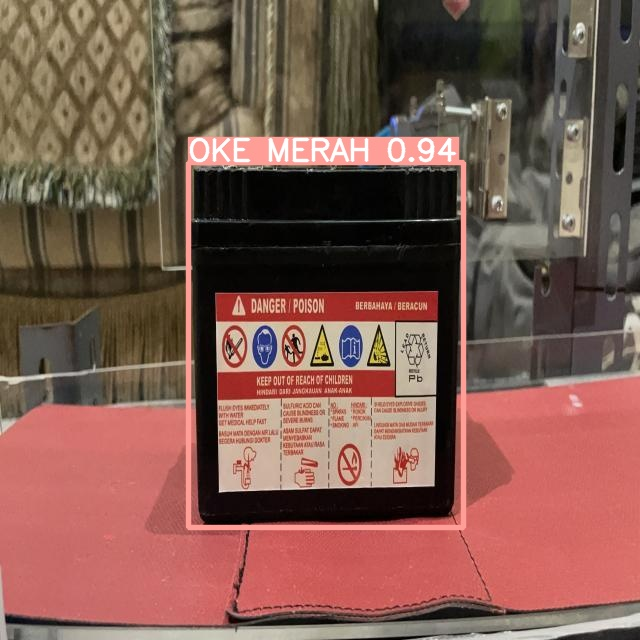

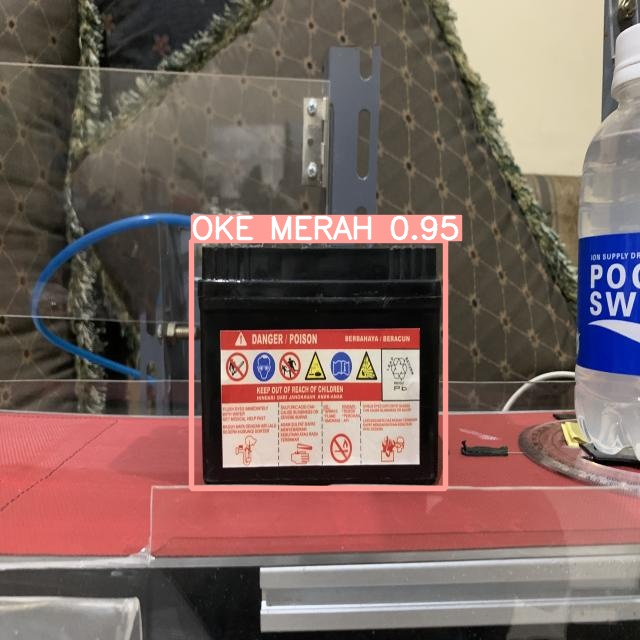

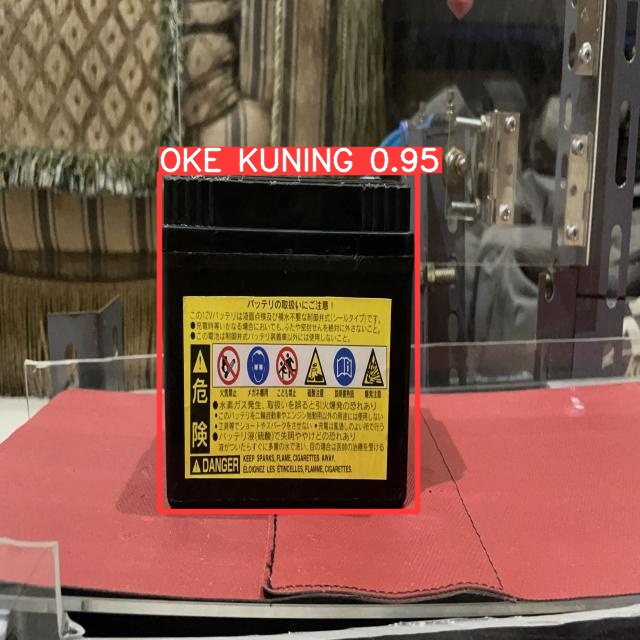

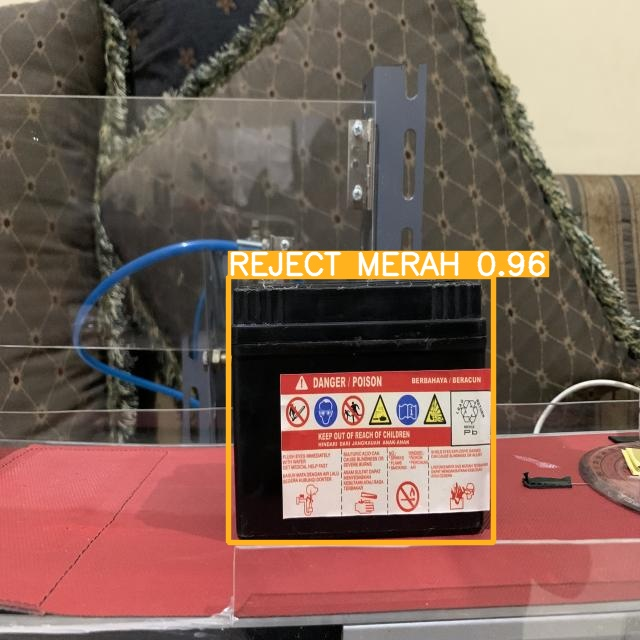

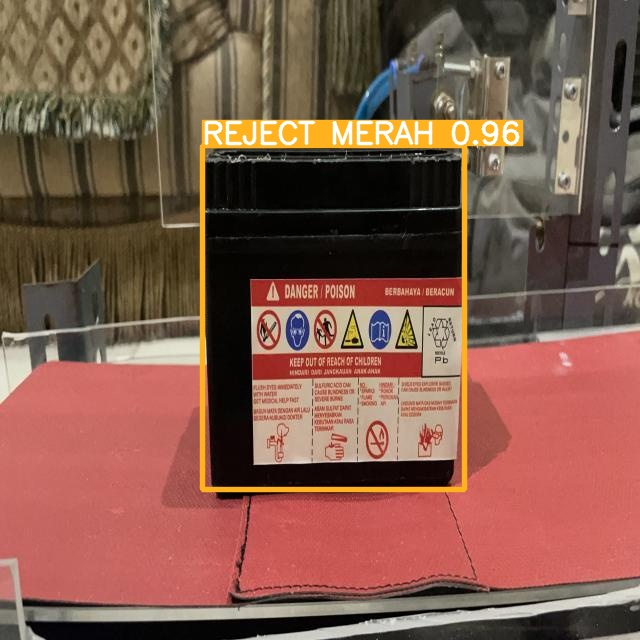

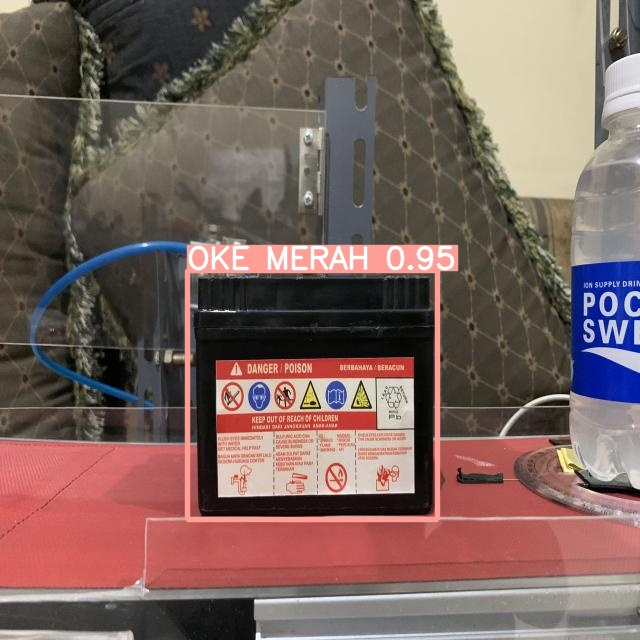

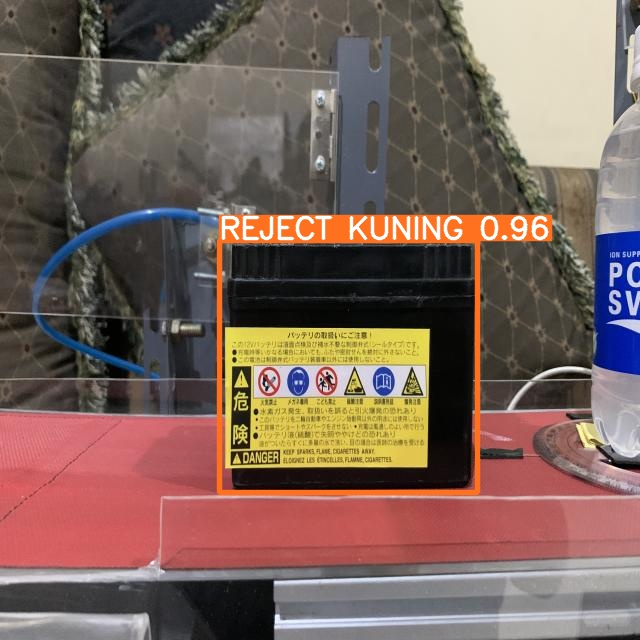

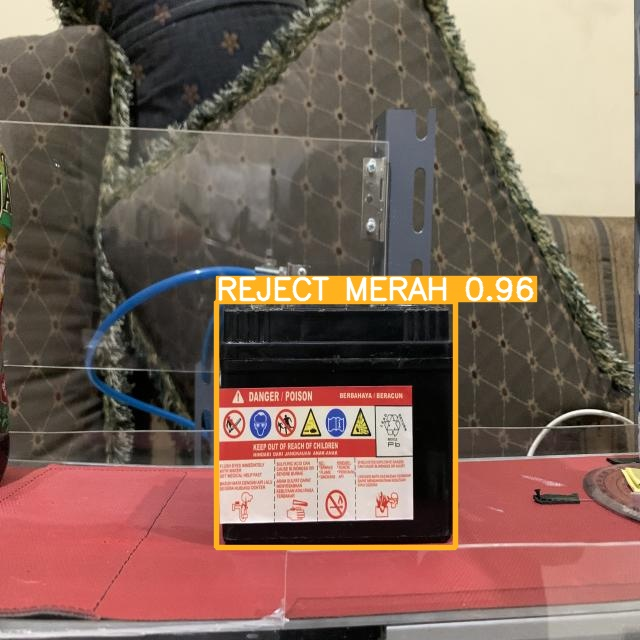

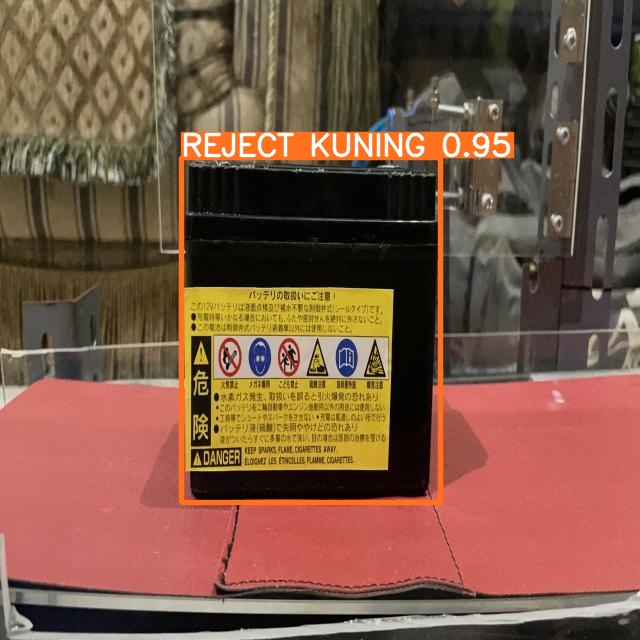

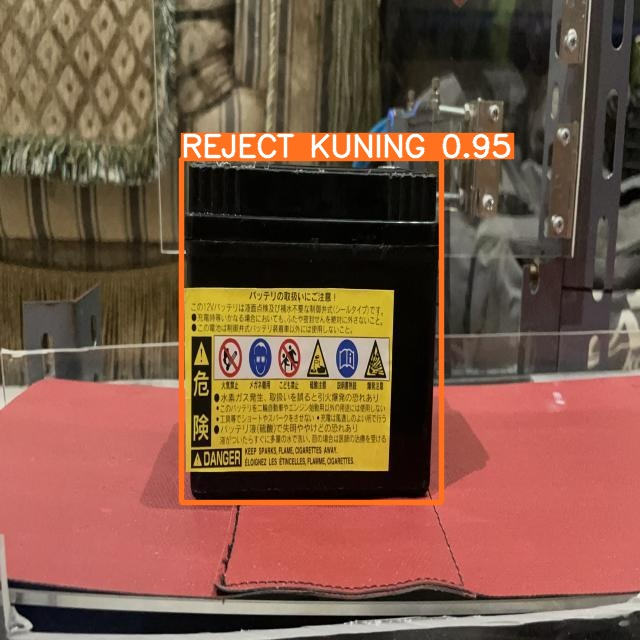

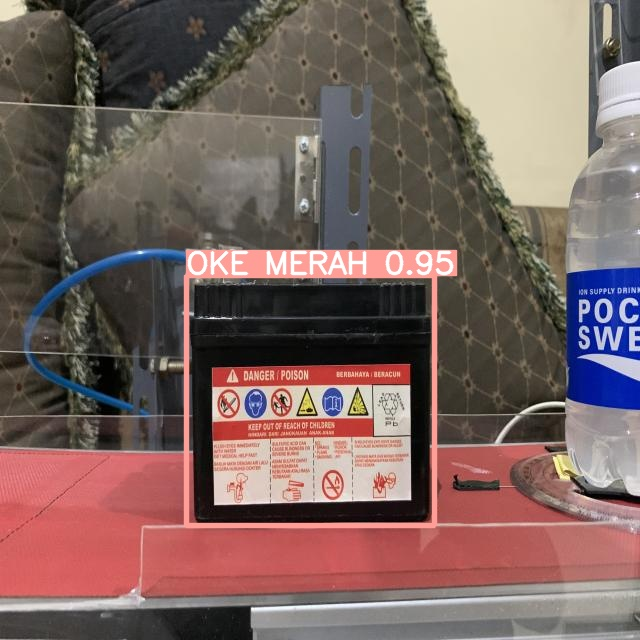

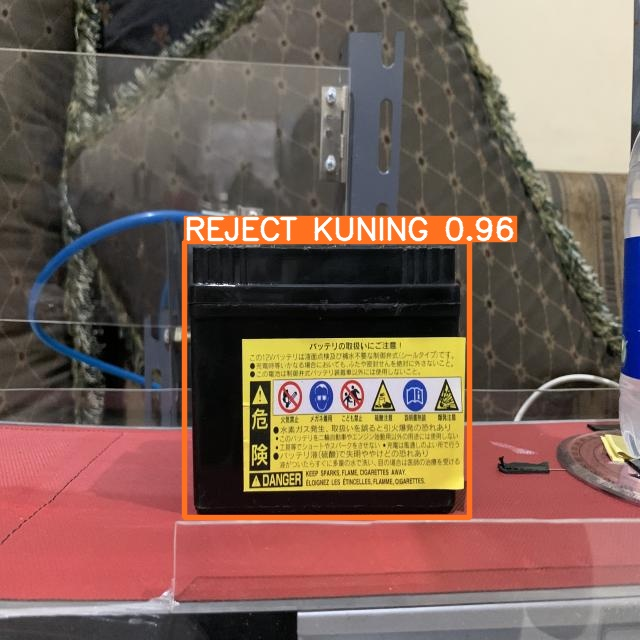

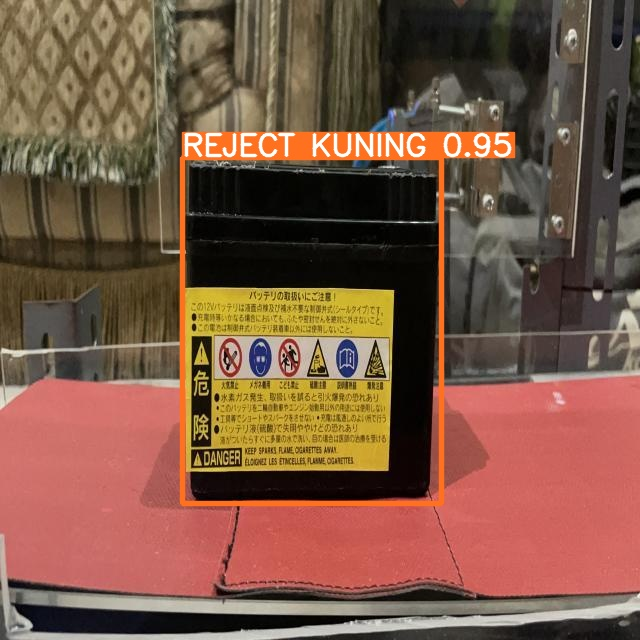

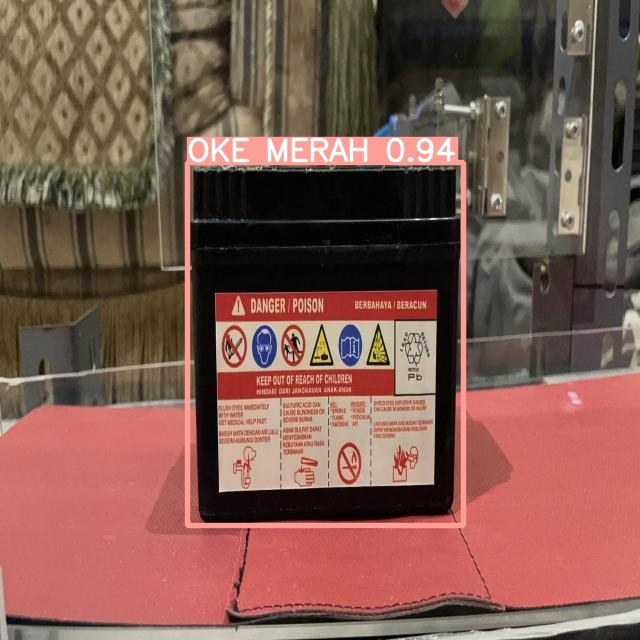

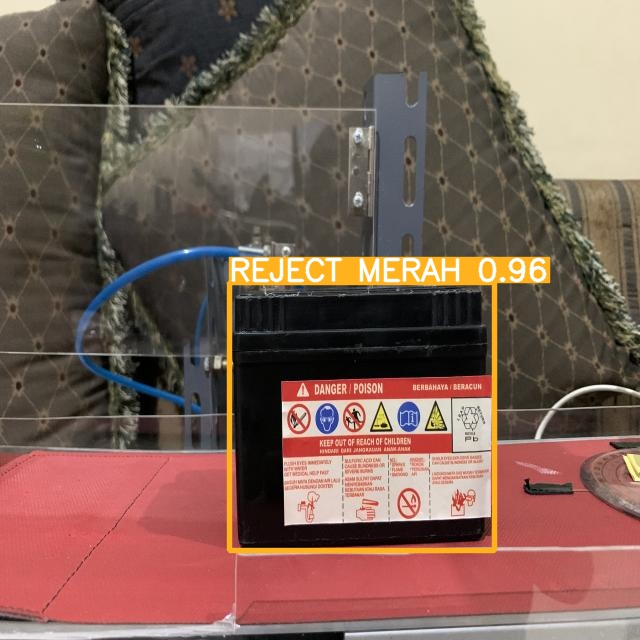

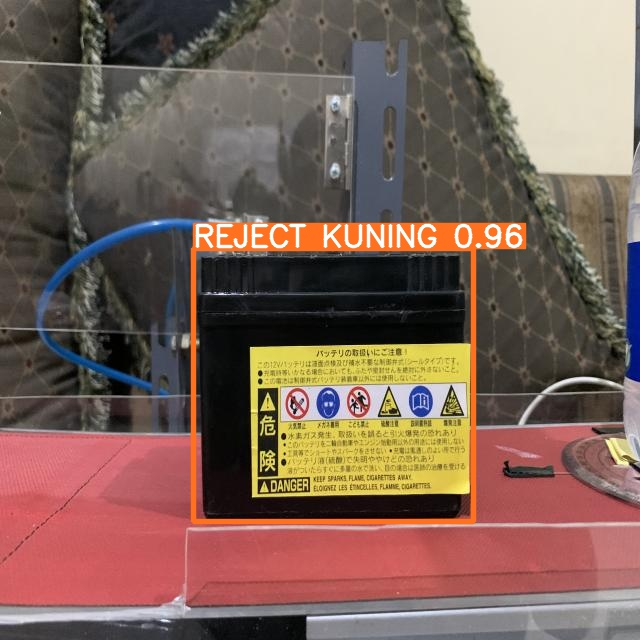

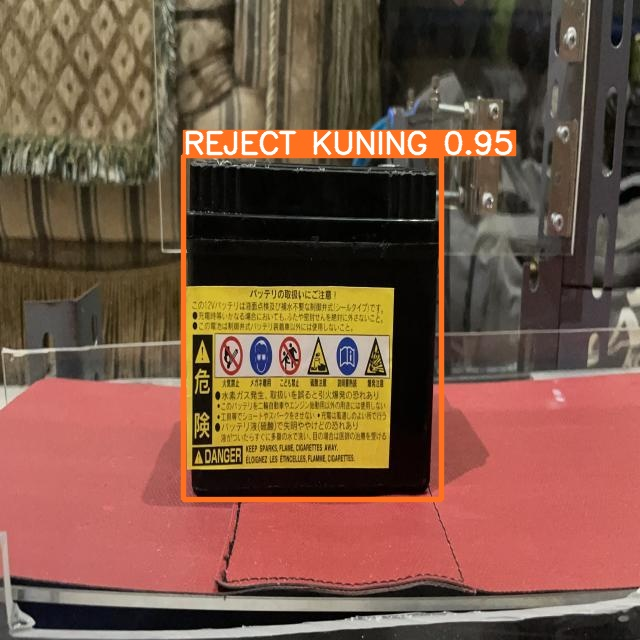

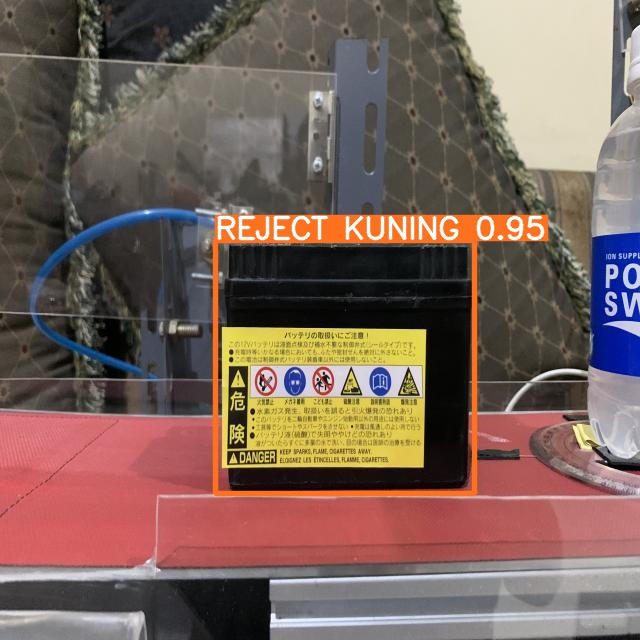

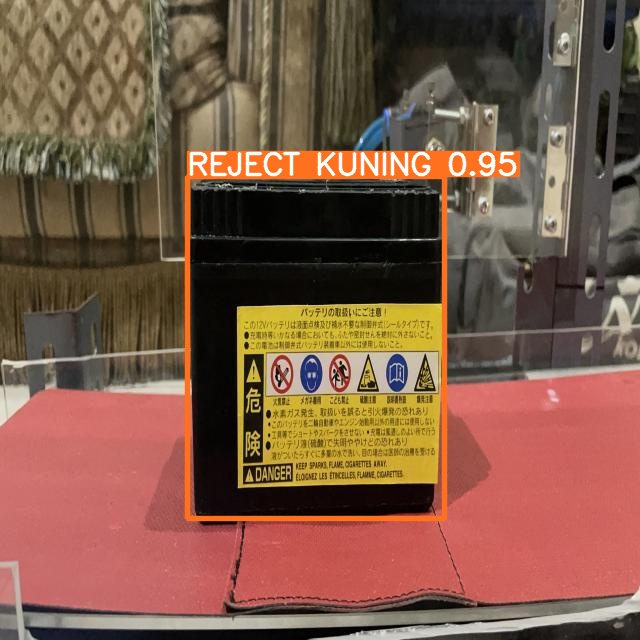

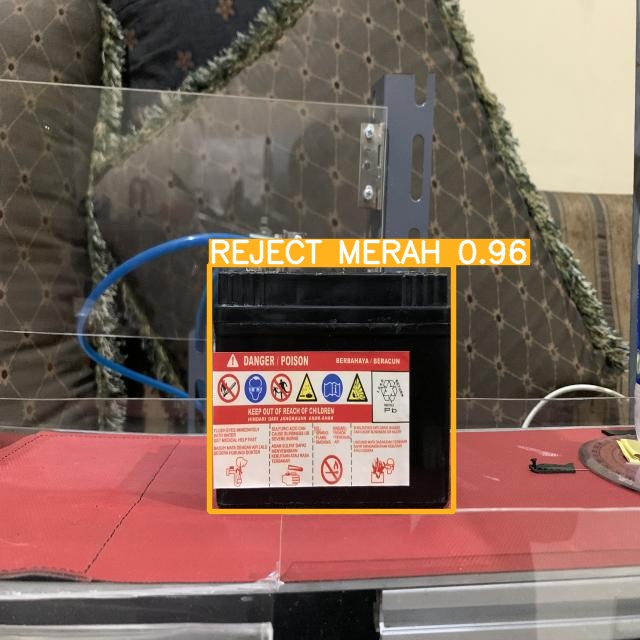

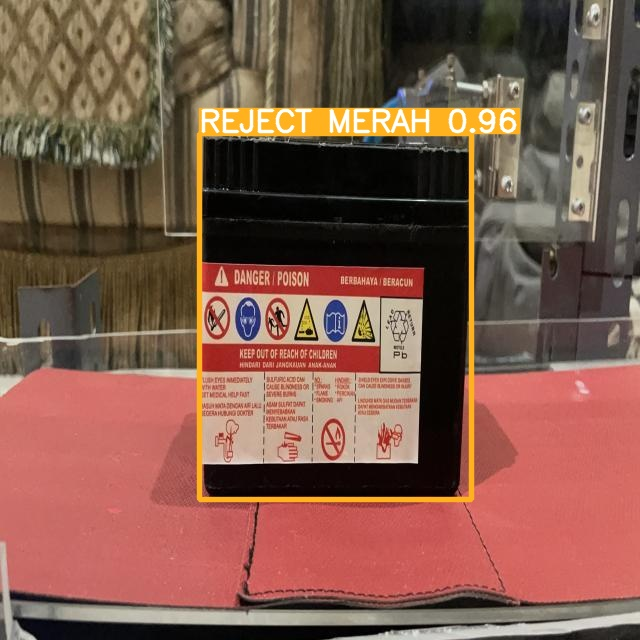

In [11]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [12]:
!zip -r /content/yolov5.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/val.py (deflated 67%)
  adding: content/yolov5/setup.cfg (deflated 45%)
  adding: content/yolov5/.gitignore (deflated 55%)
  adding: content/yolov5/.pre-commit-config.yaml (deflated 59%)
  adding: content/yolov5/train.py (deflated 69%)
  adding: content/yolov5/utils/ (stored 0%)
  adding: content/yolov5/utils/metrics.py (deflated 66%)
  adding: content/yolov5/utils/triton.py (deflated 67%)
  adding: content/yolov5/utils/callbacks.py (deflated 68%)
  adding: content/yolov5/utils/downloads.py (deflated 62%)
  adding: content/yolov5/utils/autobatch.py (deflated 56%)
  adding: content/yolov5/utils/flask_rest_api/ (stored 0%)
  adding: content/yolov5/utils/flask_rest_api/example_request.py (deflated 26%)
  adding: content/yolov5/utils/flask_rest_api/restapi.py (deflated 48%)
  adding: content/yolov5/utils/flask_rest_api/README.md (deflated 52%)
  adding: content/yolov5/utils/google_app_engine/ (stored 0%)
  adding: content/yolov

In [13]:
!zip -r /content/datasets.zip /content/datasets

  adding: content/datasets/ (stored 0%)
  adding: content/datasets/aripin-bismilah-7/ (stored 0%)
  adding: content/datasets/aripin-bismilah-7/test/ (stored 0%)
  adding: content/datasets/aripin-bismilah-7/test/labels/ (stored 0%)
  adding: content/datasets/aripin-bismilah-7/test/labels/2023_04_14_15_13_IMG_3435_JPG.rf.7714ea720cbf5b654141b4ee134f4a11.txt (deflated 14%)
  adding: content/datasets/aripin-bismilah-7/test/labels/2023_04_14_15_15_IMG_3532_JPG.rf.8e80fa72fc618ef62354c78d67f26c85.txt (deflated 17%)
  adding: content/datasets/aripin-bismilah-7/test/labels/2023_03_30_13_15_IMG_4008_JPG_jpg.rf.d2c66bb5e52cc4c3c674853fb69c2e1a.txt (deflated 23%)
  adding: content/datasets/aripin-bismilah-7/test/labels/2023_04_14_15_15_IMG_3556_JPG.rf.343a01814eaa3537339dbd117512f63c.txt (deflated 24%)
  adding: content/datasets/aripin-bismilah-7/test/labels/2023_04_14_15_18_IMG_3686_JPG.rf.e3f31803fa2a4aa8783b57b61c7a0afc.txt (deflated 17%)
  adding: content/datasets/aripin-bismilah-7/test/label